In [1]:
import keras, pickle, os
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import time
import cv2
from sklearn.metrics import auc, precision_recall_curve,average_precision_score,roc_curve,confusion_matrix
import tensorflow as tf
import keras.backend as K
import seaborn as sns

Using TensorFlow backend.


In [2]:
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

def compute_iou(y_pred, y_true):
     # ytrue, ypred is a flatten vector
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
    # compute mean iou
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection
    IoU = intersection / union.astype(np.float32)
    return np.mean(IoU)

In [3]:
model_loc = os.path.join('..', 'Data', 'binary_localizer_16_0.28892_1_54_7_12.hdf5')
data_loc = os.path.join('..', 'Data', 'binary_data.p')
x_train,x_val,y_train,y_val = pickle.load(open(data_loc,'rb'))
x_train = np.concatenate((x_train,x_val),axis=0)
y_train = np.concatenate((y_train,y_val),axis=0)
model = load_model(model_loc,custom_objects={'mean_iou':mean_iou})
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 125, 125, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 125, 125, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 125, 125, 16) 0           conv2d_1[0][0]                   
________________________________________________________________________

In [4]:
y_train.shape

(332, 125, 125, 1)

In [5]:
x_val.shape

(83, 125, 125, 1)

time:  0.22385430335998535
max: 0.99093455
0.8195099939258041


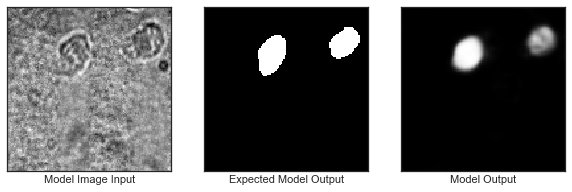

time:  0.21787619590759277
max: 0.9954372
0.6471348233383449


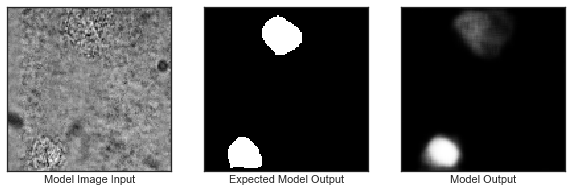

time:  0.21987509727478027
max: 0.9942448
0.8744598530229393


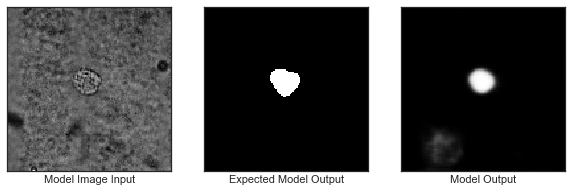

time:  0.2258613109588623
max: 0.99431413
0.8126829293303163


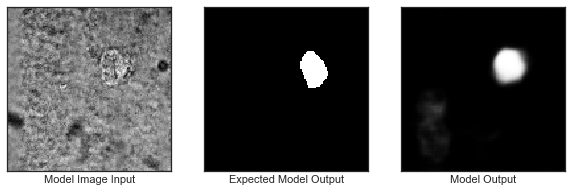

time:  0.23386645317077637
max: 0.99925244
0.9325193056563923


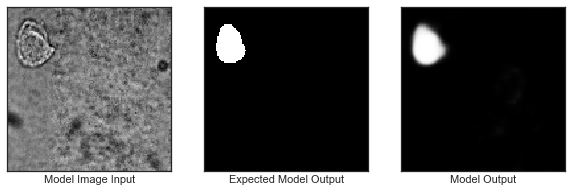

time:  0.23686432838439941
max: 0.9897525
0.9152930326563907


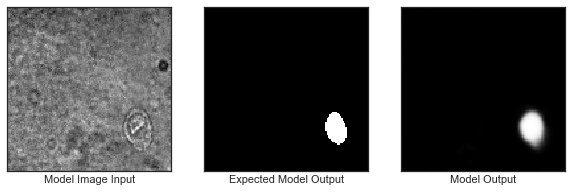

time:  0.22086262702941895
max: 0.9988635
0.8148976292844157


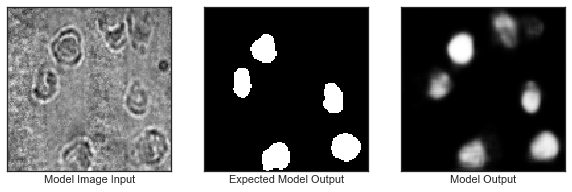

time:  0.2278578281402588
max: 0.06448361
nan


C:\Users\Harrison\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


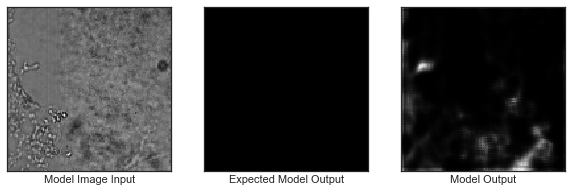

time:  0.2238631248474121
max: 0.9927758
0.8131190956012226


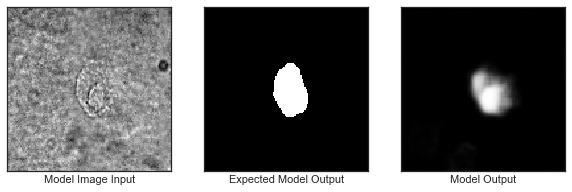

time:  0.24085330963134766
max: 0.9817987
0.8751734915505642


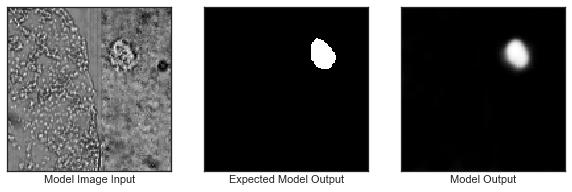

time:  0.2178633213043213
max: 0.9923868
0.774303904243656


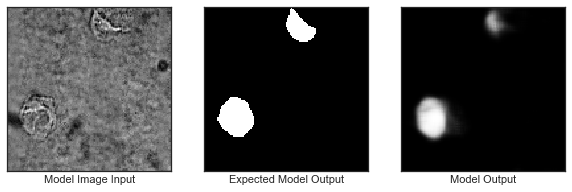

time:  0.2348494529724121
max: 0.9982875
0.7554985527624187


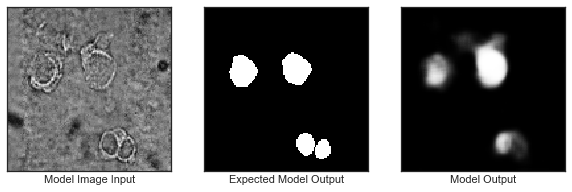

time:  0.21786808967590332
max: 0.9827348
0.8412674585375655


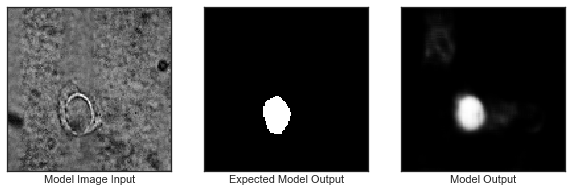

time:  0.22585463523864746
max: 0.9986865
0.6869812556747201


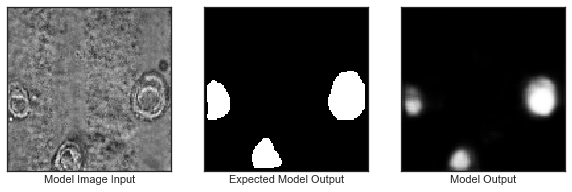

time:  0.2308511734008789
max: 0.9787514
0.7263905133203379


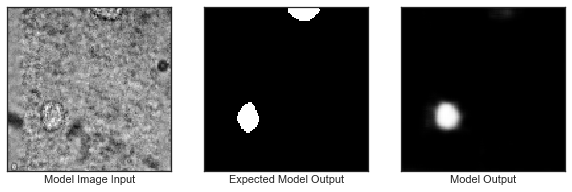

time:  0.2528514862060547
max: 0.999596
0.7666054820724968


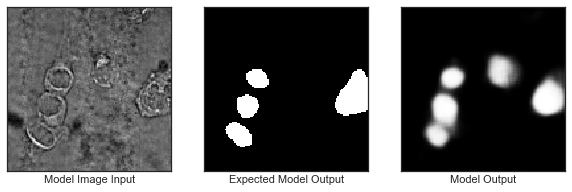

time:  0.22086524963378906
max: 0.9979561
0.8699607617064009


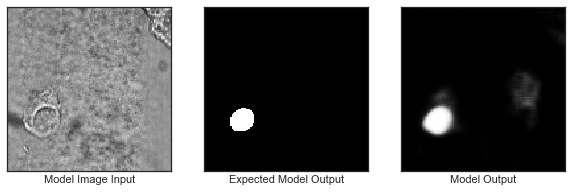

time:  0.2158651351928711
max: 0.22472036
nan


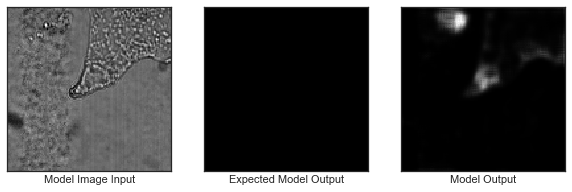

time:  0.24286198616027832
max: 0.97442555
0.716949716949717


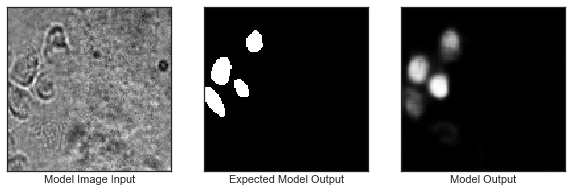

time:  0.22986841201782227
max: 0.9877999
0.8940548141300553


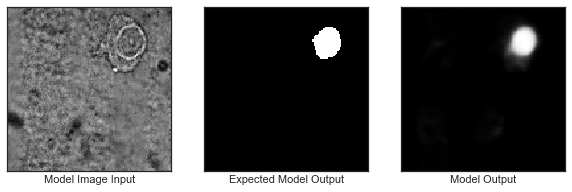

time:  0.21786928176879883
max: 0.9908887
0.8492420995269196


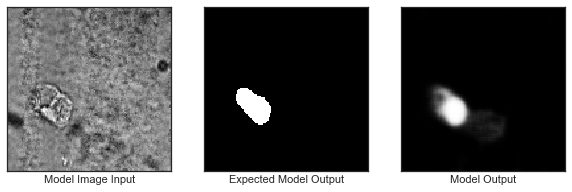

time:  0.21886324882507324
max: 0.8122839
0.778682603245484


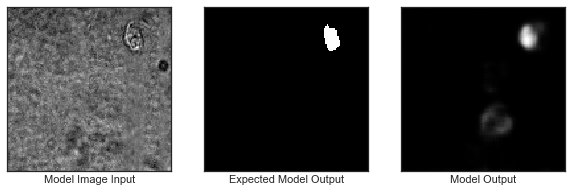

time:  0.22286391258239746
max: 0.095403194
nan


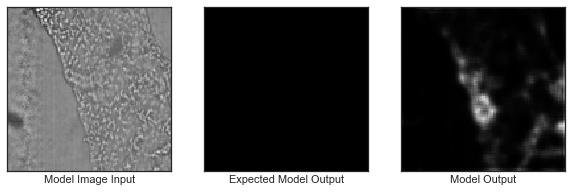

time:  0.22187376022338867
max: 0.99110115
0.7204440963598356


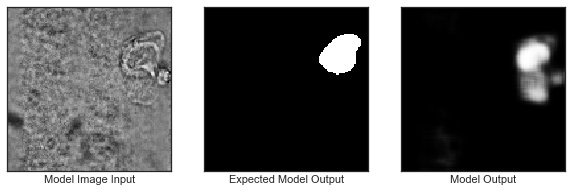

time:  0.22986936569213867
max: 0.99904025
0.8439739711669474


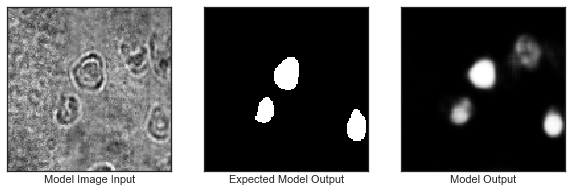

time:  0.22886943817138672
max: 0.9991145
0.8623864785663375


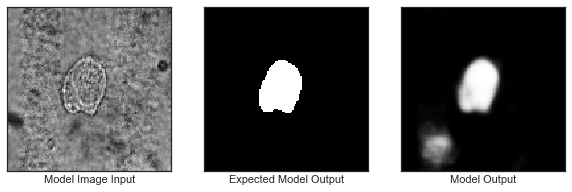

time:  0.22986769676208496
max: 0.54137087
0.499648


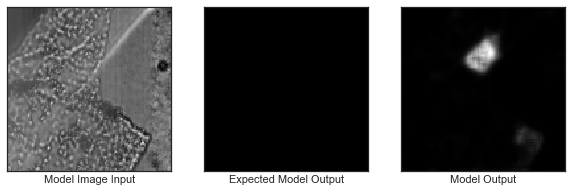

time:  0.25183939933776855
max: 0.97590494
0.8691778943266992


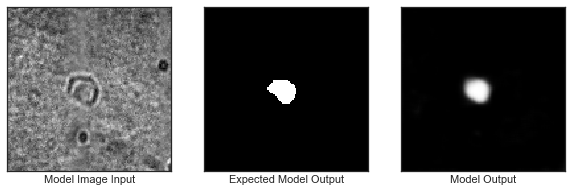

time:  0.23085880279541016
max: 0.92442596
0.7119610153250933


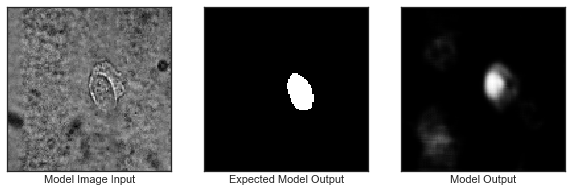

time:  0.22387242317199707
max: 0.99982786
0.7801954259365327


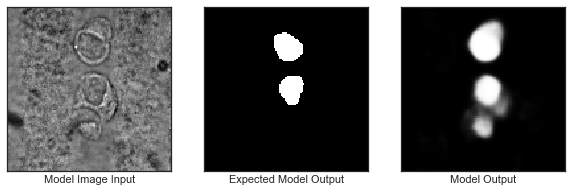

time:  0.2728445529937744
max: 0.9676739
0.7405112821181687


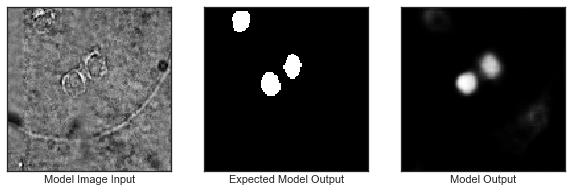

time:  0.24186158180236816
max: 0.9966176
0.8503480190462711


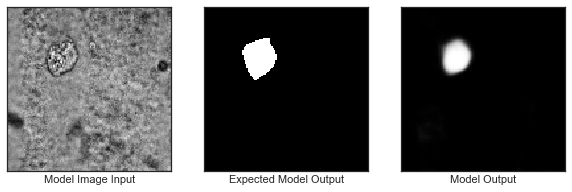

time:  0.24386119842529297
max: 0.998948
0.8478602087920988


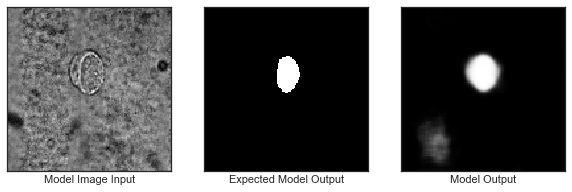

time:  0.223862886428833
max: 0.076013
nan


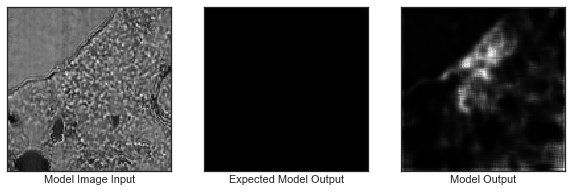

time:  0.21387887001037598
max: 0.90799797
0.6808585590545817


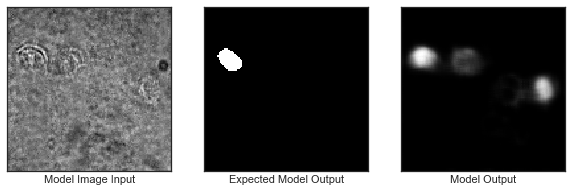

time:  0.2138688564300537
max: 0.9906047
0.863559017041223


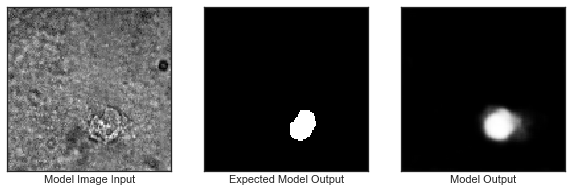

time:  0.22086000442504883
max: 0.9855473
0.837650446484355


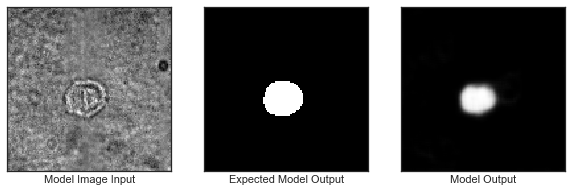

time:  0.21387910842895508
max: 0.9944455
0.7937046212369434


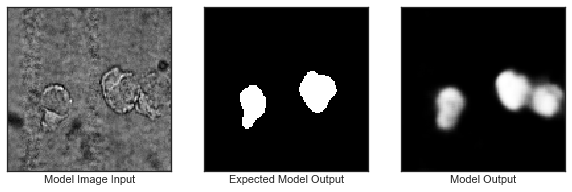

time:  0.22086524963378906
max: 0.99469554
0.8836724264276472


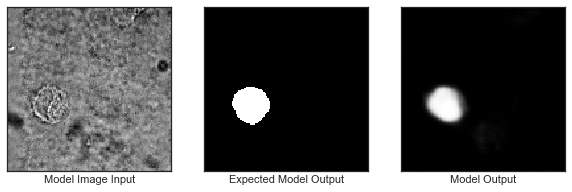

time:  0.23385381698608398
max: 0.9953352
0.8402836124109685


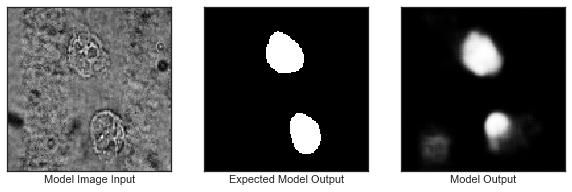

time:  0.2138686180114746
max: 0.9851502
0.8491671226296247


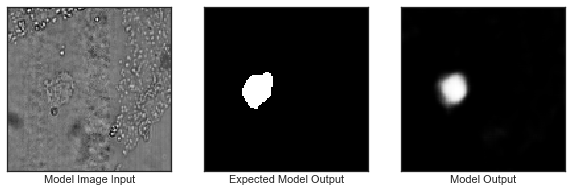

time:  0.2208728790283203
max: 0.9929613
0.7344554867226987


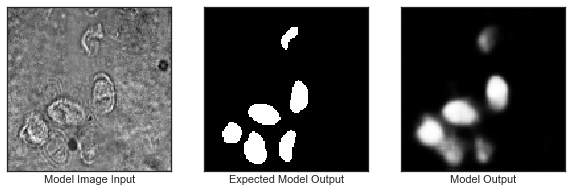

time:  0.21686434745788574
max: 0.9086832
0.6436186185789694


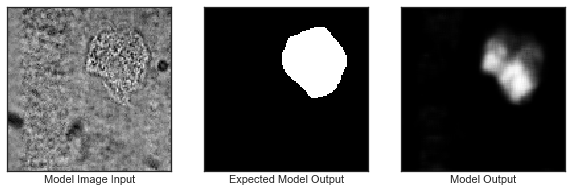

time:  0.2168598175048828
max: 0.05413878
nan


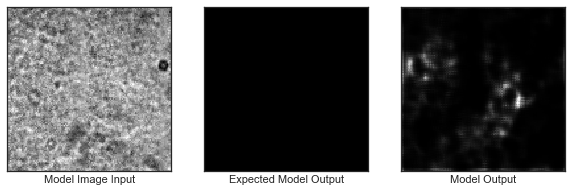

time:  0.22086644172668457
max: 0.9972577
0.805759194681082


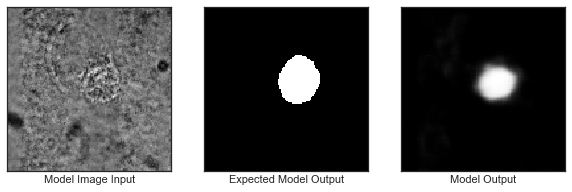

time:  0.23886322975158691
max: 0.92462134
0.6438203718250851


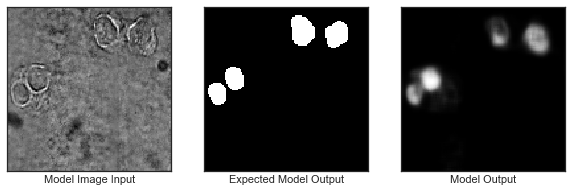

time:  0.2408452033996582
max: 0.91652846
0.7334691745315078


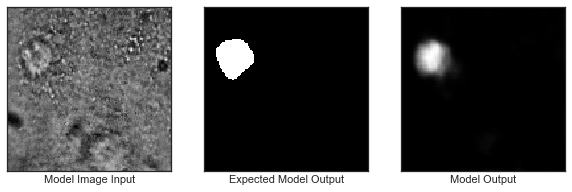

time:  0.22686123847961426
max: 0.99626666
0.8420964407626599


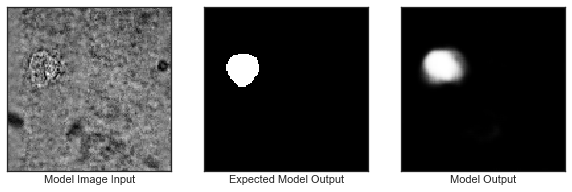

time:  0.22886967658996582
max: 0.38466018
nan


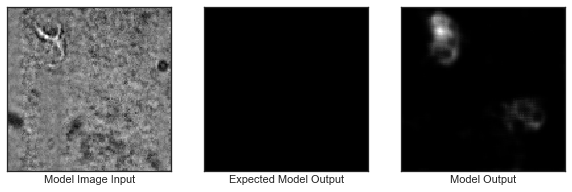

time:  0.22487092018127441
max: 0.98935044
0.47968


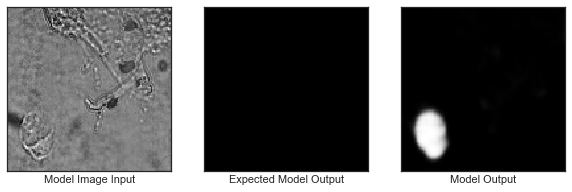

time:  0.23286724090576172
max: 0.9165099
0.85139767114226


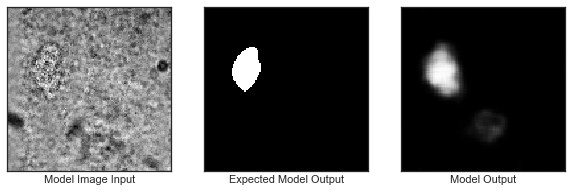

time:  0.24985814094543457
max: 0.8745209
0.488832


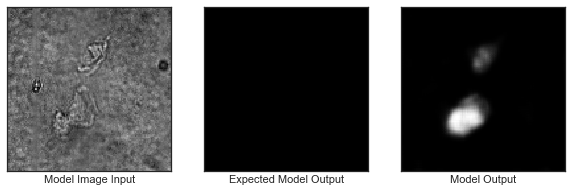

time:  0.22786760330200195
max: 0.9784616
0.7807871866695396


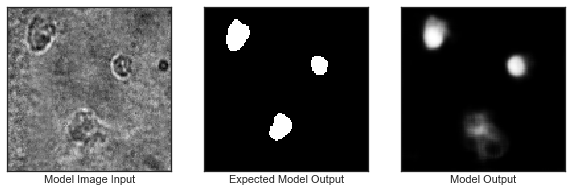

time:  0.2278611660003662
max: 0.9998131
0.7407162978489862


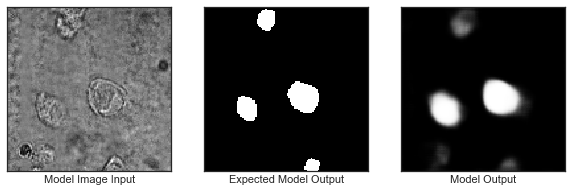

time:  0.21987152099609375
max: 0.9943543
0.9022824576504808


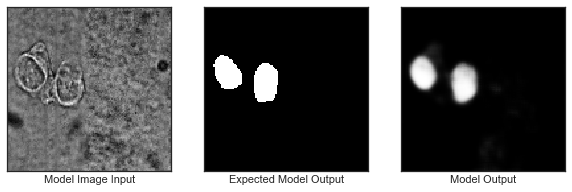

time:  0.21687936782836914
max: 0.99852395
0.6984203251895006


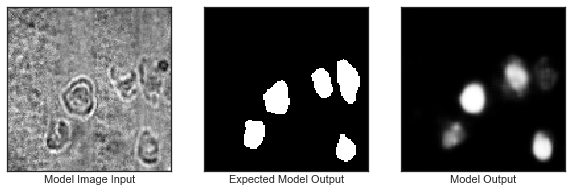

time:  0.21387839317321777
max: 0.9987737
0.8979614162246796


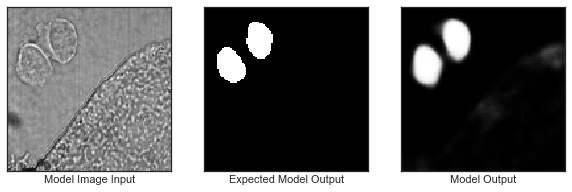

time:  0.219862699508667
max: 0.99969053
0.8791865901553974


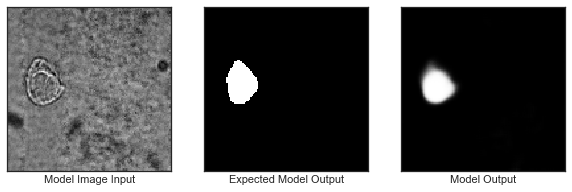

time:  0.21487736701965332
max: 0.7865982
0.7640688380562252


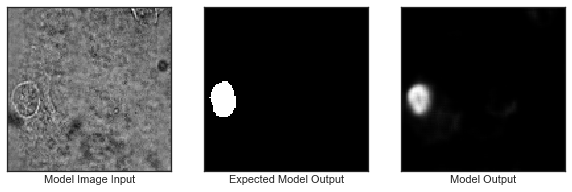

time:  0.2178668975830078
max: 0.9922972
0.8557094207327789


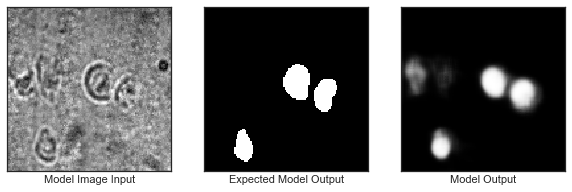

time:  0.2138657569885254
max: 0.2315883
nan


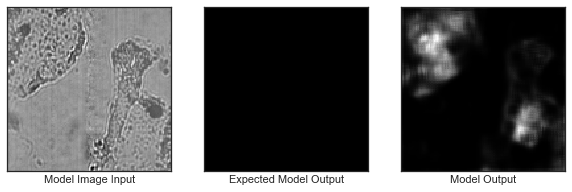

time:  0.21487784385681152
max: 0.9916346
0.8887858895697236


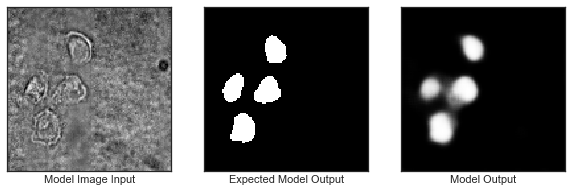

time:  0.21886610984802246
max: 0.9951459
0.8332874062759981


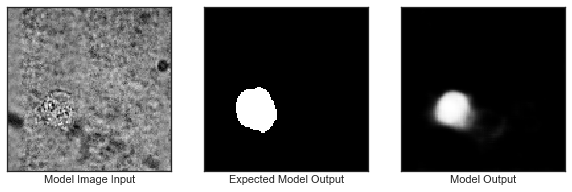

time:  0.22787070274353027
max: 0.9164614
0.6359362748981672


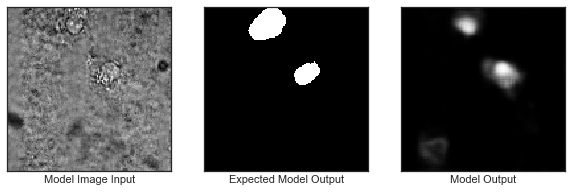

time:  0.2338550090789795
max: 0.99862623
0.8377781677813432


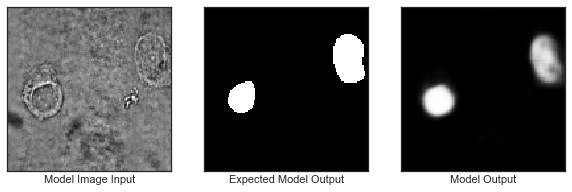

time:  0.21286416053771973
max: 0.99535984
0.9339211301398589


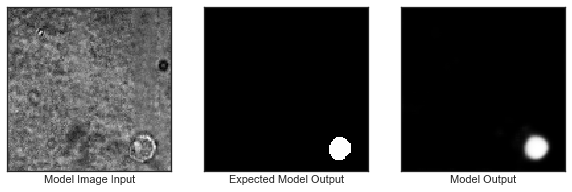

time:  0.21486163139343262
max: 0.987315
0.8366103437827634


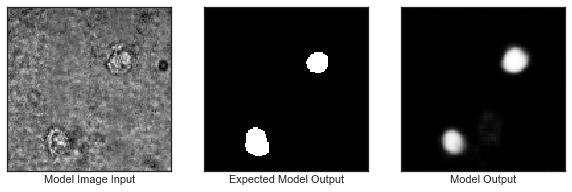

time:  0.21486902236938477
max: 0.06920442
0.488224


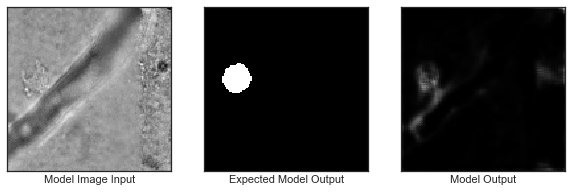

time:  0.21686649322509766
max: 0.9984991
0.8755895871575221


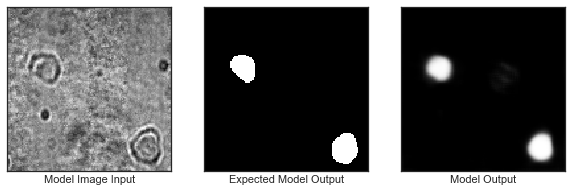

time:  0.21787452697753906
max: 0.99891293
0.8822918133990918


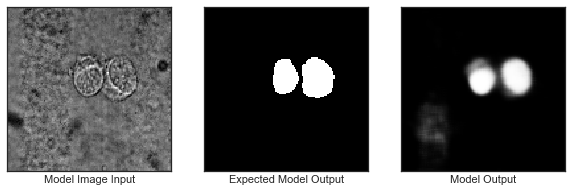

time:  0.22187423706054688
max: 0.14849329
nan


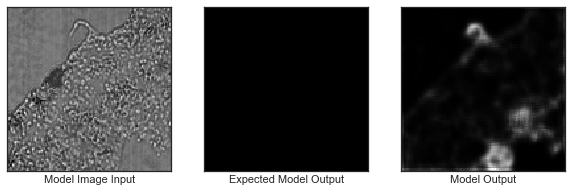

time:  0.228851318359375
max: 0.39802748
nan


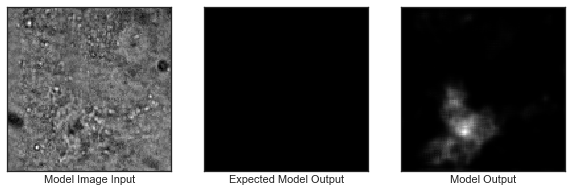

time:  0.22087526321411133
max: 0.9944447
0.8261108637554484


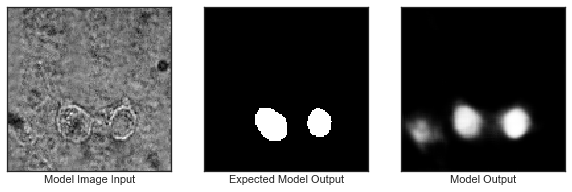

time:  0.2218644618988037
max: 0.9749837
0.7534680009789835


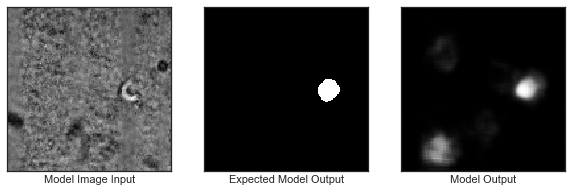

time:  0.2258615493774414
max: 0.97530746
0.6350018326827532


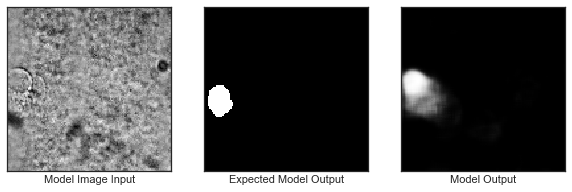

time:  0.2398514747619629
max: 0.9965615
0.878311477343345


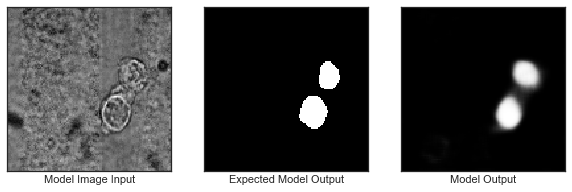

time:  0.24186205863952637
max: 0.9970112
0.7712569810950263


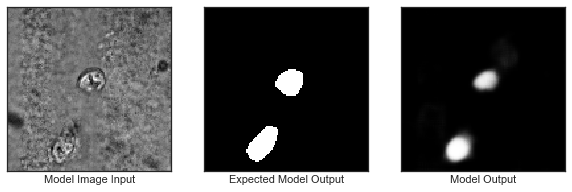

time:  0.2358565330505371
max: 0.9745182
0.888584087972014


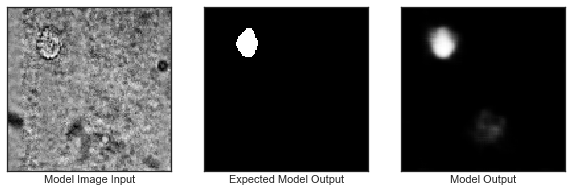

time:  0.21986651420593262
max: 0.7363844
0.6519879952520692


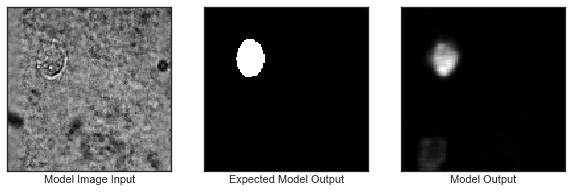

time:  0.21785736083984375
max: 0.9361613
0.7997916735310063


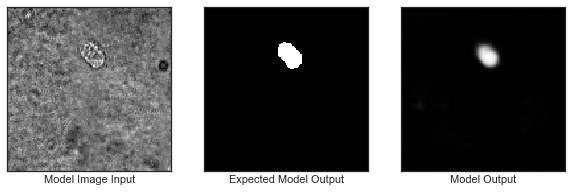

time:  0.2178659439086914
max: 0.9865891
0.7613540948551027


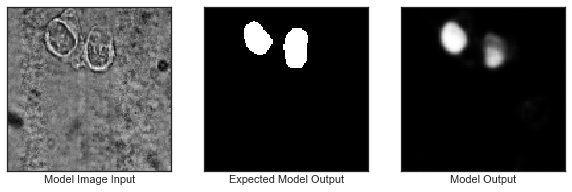

time:  0.21287941932678223
max: 0.98514175
0.8158278853689482


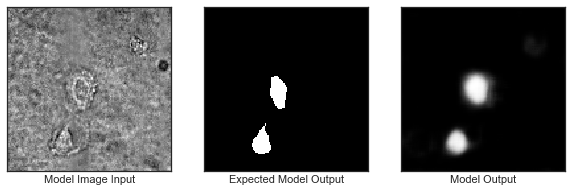

time:  0.21286606788635254
max: 0.8071408
0.6117508871960081


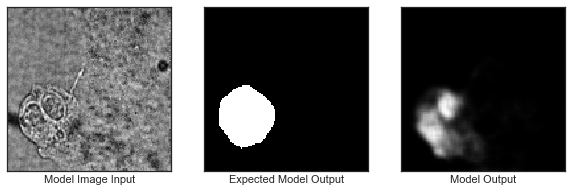

mean iou: nan


In [16]:
%matplotlib inline
y_pred = np.zeros(x_val.shape)
y_pred.shape
average_iou=[]
for i in range(x_val.shape[0]):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,20))
    model_input = np.expand_dims(x_val[i],axis=0)
#     print(model_input.shape)
    t1 = time.time()
    model_output = model.predict(model_input)
    y_pred[i,:,:,:] = model_output[0,:,:,:]
    print('time: ',time.time()-t1)
#     ret1,model_output[0,:,:,0] = cv2.threshold(model_output[0,:,:,0],.2,1,cv2.THRESH_BINARY)
    ax1.imshow(model_input[0,:,:,0],cmap='gray')
    ax1.set_xlabel('Model Image Input')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax3.imshow(model_output[0,:,:,0],cmap='gray')
    print('max:', np.max(model_output[0,:,:,0]))
    ax3.set_xlabel('Model Output')       
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax2.imshow(y_val[i,:,:,0],cmap='gray')
    ax2.set_xlabel('Expected Model Output')
    ax2.set_xticks([])
    ax2.set_yticks([])
    iou = compute_iou(np.where(model_output[0,:,:,0]>.5, 1, 0),y_val[i,:,:,0])
    average_iou.append(iou)
    print(iou)
    plt.show()
    


print('mean iou:',np.mean(average_iou))
# model_input = np.expand_dims(x_train[5],axis=0)
# model_output = model.predict(model_input)
# plt.imshow(model_output[0,:,:,1])
# plt.show()

In [17]:
# y_pred = model.predict(x_val)
# y_pred = np.round(y_pred,1)
# y_val = np.round(y_val,1)
y_predd = y_pred.ravel()
y_vall = y_val.ravel()
# print(roc_auc_score(y_vall,y_predd))
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_vall, y_predd)
print(len(thresholds_keras))

157978


0.9905542166153267


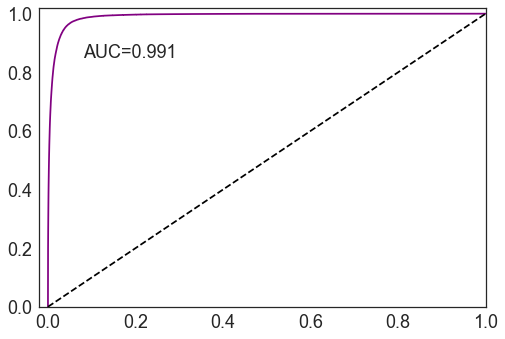

In [18]:
from scipy.signal import decimate
sns.set(style='white')


# a = decimate(fpr_keras, 5)
# b = decimate(tpr_keras, 5)
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)
plt.plot(fpr_keras, tpr_keras, color=(129/255,1/255,129/255,1))
plt.plot([0,1], [0,1], 'k--')
# plt.xlabel('False positive rate', fontsize=17)
plt.xlim([-.02,1])
plt.ylim([0,1.02])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.text(.08, .85, 'AUC=0.991', fontsize=18)
# plt.ylabel('True positive rate', fontsize=17)
# plt.title('Receiver-Operating\nCharacteristic (AUC:{:1.3f})'.format(auc_keras), fontsize=17)
# plt.title('Receiver-Operating Characteristic', fontsize=17)
# plt.gca().set_axis_off()
plt.savefig('ROC_Curve.svg', bboxinches='tight', pad_inches=0)

0.8435069046404636


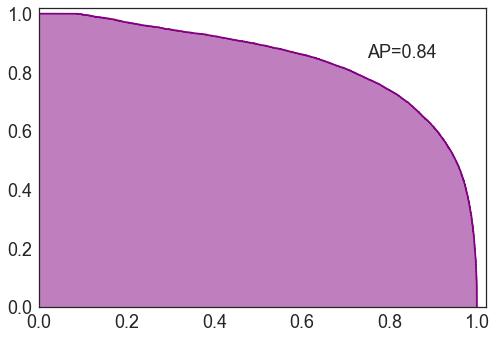

In [19]:
precision, recall, thresholds = precision_recall_curve(y_vall, y_predd)
average_precision = average_precision_score(y_vall, y_predd)
print(average_precision)
precision = np.concatenate(([0], precision))
recall = np.concatenate(([1], recall))
recall[-1]
plt.plot(recall, precision, color=(129/255,1/255,129/255,1))
plt.text(.75, .85, 'AP=0.84', fontsize=18)
plt.fill_between(recall, precision, color=(129/255,1/255,129/255,1), step='post', alpha=0.5, rasterized=True)
plt.xlim([0,1.02])
plt.ylim([0,1.02])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# plt.title('Precision-Recall\n(Average Precision={0:0.2f})'.format(average_precision), fontsize=17)
# plt.title('Precision-Recall', fontsize=17)
# plt.ylabel('Precision', fontsize=17)
# plt.xlabel('Recall', fontsize=17)
plt.savefig('precision_recall_curve.svg', bboxinches='tight')

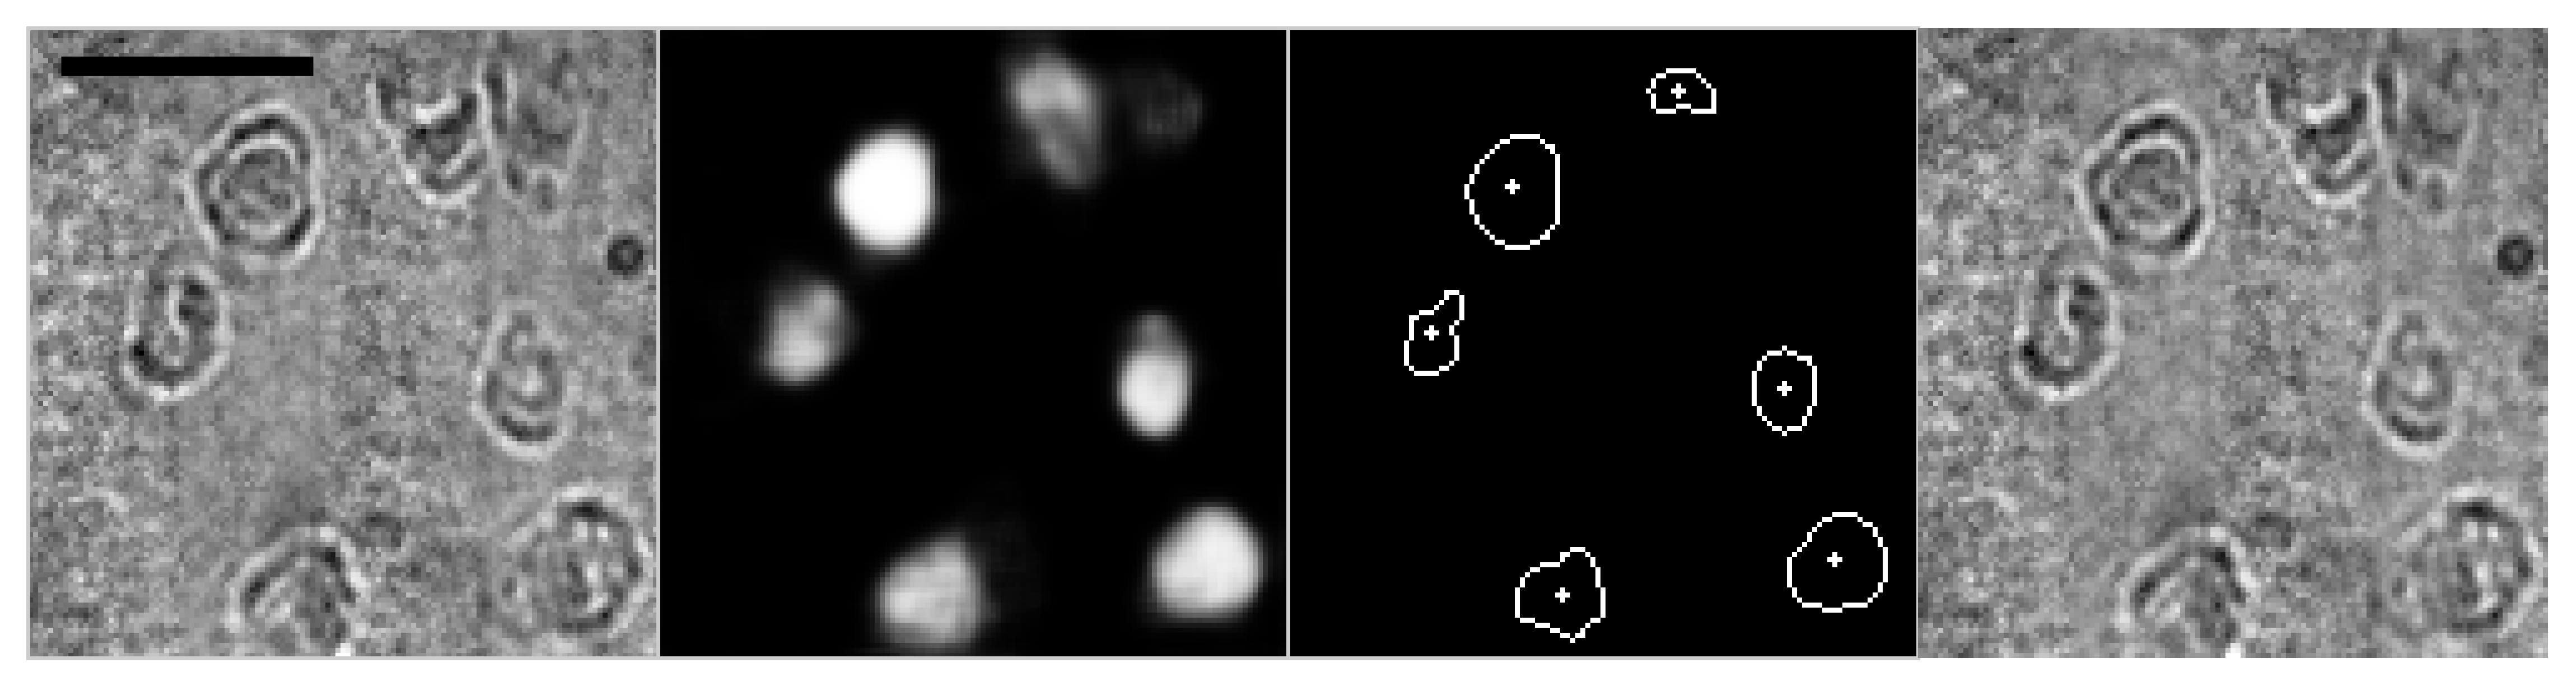

In [22]:
model_input = np.expand_dims(x_val[6],axis=0)
model_output = np.squeeze(model.predict(model_input))
_, contour_output = cv2.threshold(model_output, .5, 1, cv2.THRESH_BINARY)
im2, contours, hierarchy = cv2.findContours(contour_output.astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contour_img = np.zeros(contour_output.shape)
cv2.drawContours(contour_img, contours, -1, 255, 1)
vec_img = np.copy(contour_img)
kernel = np.ones((3,3))
intermediate = cv2.dilate(contour_img, kernel)
pt = (125//2, 125//2)
for c in contours:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.circle(contour_img, (cX, cY), 1, 255, -1)
    cv2.circle(vec_img, (cX, cY), 1, 255, -1)
    cv2.line(vec_img, pt, (cX, cY), 255, 1)
    pt = (cX, cY)
#     cv2.arrowedLine()
f,ax = plt.subplots(1,4, figsize=(9,3), dpi=500)
for i in range(4):
    ax[i].grid(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

ax[0].imshow(model_input[0,:,:,0], cmap='gray')
ax[0].plot([6,56], [7,7], color='black', linewidth=5, solid_capstyle='butt')
# ax[0].text(8, 12, r'$50\mu m$', color='black',fontweight=1000, fontsize=17)
ax[1].imshow(model_output, cmap='gray')
ax[2].imshow(contour_img, cmap='gray')
ax[3].imshow(model_input[0,:,:,0], cmap='gray')

# ax[3].imshow(np.where(intermediate==255, 2, model_input[0,:,:,0]), cmap='gray')
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig('sample_output.png', dpi=500, bboxinches='tight', pad_inches=0)